### todo

* Journal (-> Maxi)
* Import Syscal mit IP (-> Maxi)
  * K-Faktoren berechnen (analytisch)
* Plotten (roh/gefiltert)
  * Histogramme
  * Pseudodaten
  * Abklingkurven
* Filtern
  * einfache Filter (auf query-Basis)
  * komplexe Filter (nötig?)
* Prozessierung
  * Mitteln Reziproke
  * Fehlermodell (eins als proof of concept)
* Export
  * res2inv
* Zeitbeispiel?

In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.width', 1000)

## Importing the data

In [2]:
import reda

In [3]:
container = reda.ERT()

In [4]:
container.import_syscal_txt('data_normal.txt')

Summary:
                A           B           M           N           R          Vmn         Iab
count  990.000000  990.000000  990.000000  990.000000  990.000000   990.000000  990.000000
mean    15.333333   16.333333   32.666667   33.666667   -0.261351   -63.860000  253.030052
std     10.488088   10.488088   10.488088   10.488088    0.674262   165.987307   36.558830
min      1.000000    2.000000    4.000000    5.000000   -4.500319 -1270.656000  174.871000
25%      6.000000    7.000000   25.000000   26.000000   -0.119058   -29.012750  226.160000
50%     14.000000   15.000000   34.000000   35.000000   -0.018832    -4.703500  242.651000
75%     23.000000   24.000000   42.000000   43.000000   -0.004678    -1.145750  264.083000
max     44.000000   45.000000   47.000000   48.000000   -0.000399    -0.130000  358.089000


In [5]:
container.import_syscal_txt('data_reciprocal.txt', reciprocals=48)

renumbering electrode numbers
Summary:
                A           B           M           N           R          Vmn         Iab
count  990.000000  990.000000  990.000000  990.000000  990.000000   990.000000  990.000000
mean    33.666667   32.666667   16.333333   15.333333   -0.252349   -62.052862  245.187235
std     10.488088   10.488088   10.488088   10.488088    0.644725   159.446455   29.501876
min      5.000000    4.000000    2.000000    1.000000   -4.233244 -1299.341000  195.595000
25%     26.000000   25.000000    7.000000    6.000000   -0.118134   -28.134000  225.730000
50%     35.000000   34.000000   15.000000   14.000000   -0.018884    -4.582000  243.030000
75%     43.000000   42.000000   24.000000   23.000000   -0.004723    -1.105500  269.272000
max     48.000000   47.000000   45.000000   44.000000   -0.000397    -0.105000  333.394000


## Computing K factors

In [6]:
import reda.utils.geometric_factors as Kfact
K = Kfact.compute_K_analytical(container.data, spacing=0.25)
Kfact.apply_K(container.data, K)

,A,B,M,N,R,Vmn,Iab,K,rho_a,sigma_a
0,1,2,4,5,-3.906706,-1270.656,325.250,-18.849556,73.639666,0.013580
1,1,2,5,6,-1.418254,-461.287,325.250,-47.123890,66.833629,0.014963
2,1,2,6,7,-0.725030,-235.816,325.250,-94.247780,68.332465,0.014634
3,1,2,7,8,-0.381494,-124.081,325.250,-164.933614,62.921223,0.015893
4,1,2,8,9,-0.244796,-79.620,325.250,-263.893783,64.600224,0.015480
5,1,2,9,10,-0.189823,-61.740,325.250,-395.840674,75.139749,0.013309
6,1,2,10,11,-0.119680,-38.926,325.250,-565.486678,67.677585,0.014776
7,1,2,11,12,-0.080252,-26.102,325.250,-777.544182,62.399564,0.016026
8,1,2,12,13,-0.058297,-18.961,325.250,-1036.725576,60.437675,0.016546
9,1,2,13,14,-0.042469,-13.813,325.250,-1347.743248,57.237133,0.017471


In [7]:
import reda.utils.fix_sign_with_K as fixK
fixK.fix_sign_with_K(container.data)

,A,B,M,N,R,Vmn,Iab,K,rho_a,sigma_a
0,1,2,5,4,3.906706,1270.656,325.250,18.849556,73.639666,0.013580
1,1,2,6,5,1.418254,461.287,325.250,47.123890,66.833629,0.014963
2,1,2,7,6,0.725030,235.816,325.250,94.247780,68.332465,0.014634
3,1,2,8,7,0.381494,124.081,325.250,164.933614,62.921223,0.015893
4,1,2,9,8,0.244796,79.620,325.250,263.893783,64.600224,0.015480
5,1,2,10,9,0.189823,61.740,325.250,395.840674,75.139749,0.013309
6,1,2,11,10,0.119680,38.926,325.250,565.486678,67.677585,0.014776
7,1,2,12,11,0.080252,26.102,325.250,777.544182,62.399564,0.016026
8,1,2,13,12,0.058297,18.961,325.250,1036.725576,60.437675,0.016546
9,1,2,14,13,0.042469,13.813,325.250,1347.743248,57.237133,0.017471


## Plotting raw data

Generating histogram plot for key: R
Generating histogram plot for key: rho_a
Generating histogram plot for key: Iab


{'all': <matplotlib.figure.Figure at 0x7f1fb408bc88>}

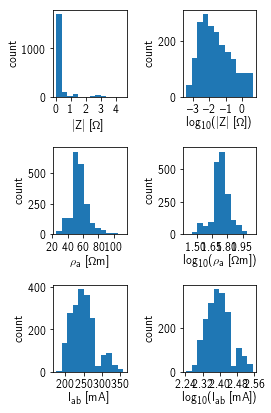

In [8]:
import reda.plotters as plotters
plotters.histograms.plot_histograms(container, ['R', 'rho_a', 'Iab', ])

In [9]:
import reda.utils.norrec as norrec

In [10]:
norrec.assign_norrec_to_df(container.data)

generating ids
assigning ids


,A,B,M,N,R,Vmn,Iab,K,rho_a,sigma_a,id,norrec
0,1,2,5,4,3.906706,1270.656,325.250,18.849556,73.639666,0.013580,129,nor
1,1,2,6,5,1.418254,461.287,325.250,47.123890,66.833629,0.014963,171,nor
2,1,2,7,6,0.725030,235.816,325.250,94.247780,68.332465,0.014634,213,nor
3,1,2,8,7,0.381494,124.081,325.250,164.933614,62.921223,0.015893,255,nor
4,1,2,9,8,0.244796,79.620,325.250,263.893783,64.600224,0.015480,297,nor
5,1,2,10,9,0.189823,61.740,325.250,395.840674,75.139749,0.013309,339,nor
6,1,2,11,10,0.119680,38.926,325.250,565.486678,67.677585,0.014776,381,nor
7,1,2,12,11,0.080252,26.102,325.250,777.544182,62.399564,0.016026,423,nor
8,1,2,13,12,0.058297,18.961,325.250,1036.725576,60.437675,0.016546,465,nor
9,1,2,14,13,0.042469,13.813,325.250,1347.743248,57.237133,0.017471,507,nor


In [11]:
# looping over normal-reciprocal pairs
group = container.data.groupby('id')
for name, item in group:
    print(type(item))
    print(item[['A', 'B', 'M', 'N', 'R', 'rho_a']])

<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
0    1  2  5  4  3.906706  73.639666
989  4  5  2  1  3.658108  68.953711
<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
1    1  2  6  5  1.418254  66.833629
988  5  6  2  1  1.352428  63.731679
<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
44   2  3  6  5  3.388527  63.872224
987  5  6  3  2  3.244140  61.150591
<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
2    1  2  7  6  0.725030  68.332465
986  6  7  2  1  0.717153  67.590078
<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
45   2  3  7  6  1.473301  69.427689
985  6  7  3  2  1.442918  67.995919
<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
87   3  4  7  6  4.500319  84.829014
984  6  7  4  3  4.233244  79.794762
<class 'pandas.core.frame.DataFrame'>
     A  B  M  N         R      rho_a
3    1  2  8  7  0.381494  62.9

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
327   9  10  16  15  0.353170  58.249604
915  15  16  10   9  0.350795  57.857945
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
362  10  11  16  15  0.591940  55.789035
914  15  16  11  10  0.584034  55.043920
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
396  11  12  16  15  1.218479  57.419474
913  15  16  12  11  1.181731  55.687765
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
429  12  13  16  15  3.162792  59.617224
912  15  16  13  12  3.012335  56.781173
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
12    1   2  17  16  0.024425  64.457207
911  16  17   2   1  0.024462  64.552662
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
55    2   3  17  16  0.035534  76.190208
910  16  17   3   2  0.036035  77.264493
<class 'pandas.core.frame.DataFram

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
434  12  13  21  20  0.130803  51.777220
842  20  21  13  12  0.126856  50.214582
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
466  13  14  21  20  0.180893  47.736442
841  20  21  14  13  0.177712  46.896991
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
497  14  15  21  20  0.312708  51.576123
840  20  21  15  14  0.304306  50.190260
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
527  15  16  21  20  0.523245  49.314635
839  20  21  16  15  0.507263  47.808457
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
556  16  17  21  20  1.220373  57.508711
838  20  21  17  16  1.165840  54.938911
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
584  17  18  21  20  3.288215  61.981385
837  20  21  18  17  3.080913  58.073848
<class 'pandas.core.frame.DataFram

      A   B   M   N         R      rho_a
640  19  20  24  23  1.137560  53.606268
781  23  24  20  19  1.075153  50.665394
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
665  20  21  24  23  3.324569  62.666657
780  23  24  21  20  3.134463  59.083236
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
20    1   2  25  24  0.006019  57.407796
779  24  25   2   1  0.006269  59.791401
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
63    2   3  25  24  0.008093  67.540769
778  24  25   3   2  0.008122  67.787084
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
105   3   4  25  24  0.013196  95.763594
777  24  25   4   3  0.012780  92.747757
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
146   4   5  25  24  0.013280  83.232968
776  24  25   5   4  0.013031  81.673459
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R     

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
591  17  18  28  27  0.077252  60.066984
697  27  28  18  17  0.076048  59.130783
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
618  18  19  28  27  0.090441  51.143388
696  27  28  19  18  0.090571  51.216735
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
644  19  20  28  27  0.116919  46.281130
695  27  28  20  19  0.113316  44.854901
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
669  20  21  28  27  0.198517  52.387382
694  27  28  21  20  0.194677  51.373931
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
693  21  22  28  27  0.336653  55.525438
693  27  28  22  21  0.332628  54.861572
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
716  22  23  28  27  0.580557  54.716203
692  27  28  23  22  0.569755  53.698130
<class 'pandas.core.frame.DataFram

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
153   4   5  32  31  0.004896  75.577188
608  31  32   5   4  0.004841  74.731355
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
193   5   6  32  31  0.004122  56.818355
607  31  32   6   5  0.004080  56.236304
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
232   6   7  32  31  0.005119  62.716177
606  31  32   7   6  0.005116  62.684556
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
270   7   8  32  31  0.004576  49.595653
605  31  32   8   7  0.004978  53.959395
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
307   8   9  32  31  0.005880  56.087019
604  31  32   9   8  0.005805  55.363753
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
343   9  10  32  31  0.006971  58.174391
603  31  32  10   9  0.006950  57.999555
<class 'pandas.core.frame.DataFram

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
272   7   8  34  33  0.004017  55.369635
548  33  34   8   7  0.004096  56.456777
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
309   8   9  34  33  0.004428  54.252004
547  33  34   9   8  0.004479  54.874348
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
345   9  10  34  33  0.005460  59.178403
546  33  34  10   9  0.005483  59.429105
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
380  10  11  34  33  0.005462  52.093014
545  33  34  11  10  0.005574  53.161387
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
414  11  12  34  33  0.006244  52.114071
544  33  34  12  11  0.006276  52.374986
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
447  12  13  34  33  0.007458  54.120121
543  33  34  13  12  0.007529  54.639990
<class 'pandas.core.frame.DataFram

      A   B   M   N         R      rho_a
512  14  15  36  35  0.007855  57.004010
480  35  36  15  14  0.007858  57.023907
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
542  15  16  36  35  0.008683  54.422967
479  35  36  16  15  0.008740  54.779618
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
571  16  17  36  35  0.011689  62.796037
478  35  36  17  16  0.011706  62.885249
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
599  17  18  36  35  0.013483  61.568302
477  35  36  18  17  0.013491  61.605056
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
626  18  19  36  35  0.013760  52.909676
476  35  36  19  18  0.013844  53.235495
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
652  19  20  36  35  0.014790  47.393797
475  35  36  20  19  0.014581  46.722470
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R     

397  37  38  33  32  0.564235  53.177864
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
913  33  34  38  37  1.211421  57.086875
396  37  38  34  33  1.171914  55.225157
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
924  34  35  38  37  2.585213  48.730108
395  37  38  35  34  2.477297  46.695946
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
34    1   2  39  38  0.001324  52.626434
394  38  39   2   1  0.001313  52.193929
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
77    2   3  39  38  0.001645  60.221356
393  38  39   3   2  0.001696  62.113828
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
119   3   4  39  38  0.002571  86.496617
392  38  39   4   3  0.002530  85.125519
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
160   4   5  39  38  0.002418  74.562634
391  38  39   5   4  0.002517  77.

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
810  26  27  40  39  0.029959  51.389813
334  39  40  27  26  0.029793  51.104901
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
828  27  28  40  39  0.037582  50.651151
333  39  40  28  27  0.037316  50.291865
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
845  28  29  40  39  0.049227  51.035100
332  39  40  29  28  0.049102  50.904839
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
861  29  30  40  39  0.063516  49.386347
331  39  40  30  29  0.063377  49.278606
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
876  30  31  40  39  0.096046  54.312477
330  39  40  31  30  0.096428  54.529011
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
890  31  32  40  39  0.129386  51.216268
329  39  40  32  31  0.127448  50.449013
<class 'pandas.core.frame.DataFram

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
830  27  28  42  41  0.023202  49.747510
260  41  42  28  27  0.022831  48.952187
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
847  28  29  42  41  0.027806  47.696652
259  41  42  29  28  0.028004  48.035503
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
863  29  30  42  41  0.036493  49.183783
258  41  42  30  29  0.036363  49.008308
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
878  30  31  42  41  0.046662  48.375711
257  41  42  31  30  0.046804  48.522778
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
892  31  32  42  41  0.065801  51.162878
256  41  42  32  31  0.064642  50.262091
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
905  32  33  42  41  0.093751  53.014771
255  41  42  33  32  0.093042  52.613741
<class 'pandas.core.frame.DataFram

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
795  25  26  44  43  0.013694  62.532536
185  43  44  26  25  0.013729  62.689011
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
814  26  27  44  43  0.016862  64.840727
184  43  44  27  26  0.016740  64.368673
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
832  27  28  44  43  0.020066  64.300232
183  43  44  28  27  0.019755  63.304808
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
849  28  29  44  43  0.024679  65.125737
182  43  44  29  28  0.024466  64.564871
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
865  29  30  44  43  0.029154  62.510078
181  43  44  30  29  0.029087  62.367160
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
880  30  31  44  43  0.040666  69.755222
180  43  44  31  30  0.039984  68.585705
<class 'pandas.core.frame.DataFram

<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
756  23  24  46  45  0.006002  50.094215
106  45  46  24  23  0.005973  49.852238
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
777  24  25  46  45  0.006471  46.960891
105  45  46  25  24  0.006616  48.011917
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
797  25  26  46  45  0.006997  43.854816
104  45  46  26  25  0.007014  43.960734
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
816  26  27  46  45  0.008452  45.404168
103  45  46  27  26  0.008408  45.168317
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
834  27  28  46  45  0.009873  45.081036
102  45  46  28  27  0.009820  44.843379
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
851  28  29  46  45  0.011922  45.844653
101  45  46  29  28  0.011996  46.127302
<class 'pandas.core.frame.DataFram

      A   B   M   N         R      rho_a
554  15  16  48  47  0.001252  32.186665
29   47  48  16  15  0.001276  32.803750
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
583  16  17  48  47  0.001631  38.110423
28   47  48  17  16  0.001667  38.969318
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
611  17  18  48  47  0.001794  38.006200
27   47  48  18  17  0.001792  37.968785
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
638  18  19  48  47  0.001699  32.498614
26   47  48  19  18  0.001730  33.096330
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
664  19  20  48  47  0.001655  28.490210
25   47  48  20  19  0.001632  28.101929
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R      rho_a
689  20  21  48  47  0.002152  33.223760
24   47  48  21  20  0.002172  33.532691
<class 'pandas.core.frame.DataFrame'>
      A   B   M   N         R     